In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [120]:
df_cost = pd.read_csv("The dataset.csv")
df_cost

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [121]:
# Checking number of rows and columns 
print("Number of Rows:", df_cost.shape[0])
print("Number of Columns:", df_cost.shape[1])

# Checking percentage of null values
print("*****Percentage of Null Values*****")
print(round(df_cost.isnull().sum() * 100/df_cost.shape[0]))

Number of Rows: 4324
Number of Columns: 9
*****Percentage of Null Values*****
Unnamed: 0.1       0.0
Unnamed: 0         0.0
Company Name       0.0
Location           0.0
Datum              0.0
Detail             0.0
Status Rocket      0.0
 Rocket           78.0
Status Mission     0.0
dtype: float64


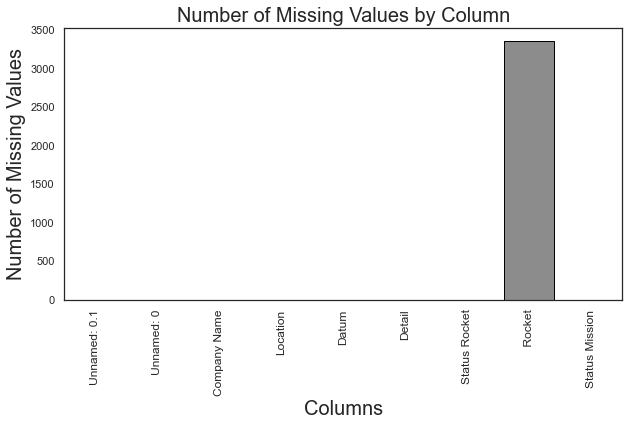

In [122]:
plt.figure(figsize=(10,5))
sns.barplot(edgecolor='black',x=df_cost.columns, y=df_cost.isnull().sum())
plt.title("Number of Missing Values by Column", fontsize=20)
plt.xlabel("Columns",fontsize=20)
plt.ylabel("Number of Missing Values", fontsize=20)
plt.xticks(rotation=90,fontsize=12)
plt.show()

In [123]:
#Converting the values in the 'Datum' column to datetime objects and stores them in the 'Launch date' column.
df_cost['Launch date']=pd.to_datetime(df_cost['Datum'])
#Converting the 'Launch date' column from a datetime object to a string.
df_cost['Launch date']=df_cost['Launch date'].astype(str)

In [124]:
#Splitting the 'Launch date' column on the space character and takes the first part of the resulting list.
df_cost['Launch date']=df_cost['Launch date'].str.split(' ',expand=True)[0]
#Converting the 'Launch date' column back to a datetime object.
df_cost['Launch date']=pd.to_datetime(df_cost['Launch date'])
df_cost.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Launch date
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30


In [125]:
df_cost['Launch date']=df_cost['Launch date'].astype(str)

In [126]:
#For the visualisation and the model prediction we split the 'Launch date' with a new column with only the 'year'
df_cost['Year'] = df_cost['Launch date'].str.split('-', expand=True)[0]

In [127]:
print(df_cost.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission', 'Launch date',
       'Year'],
      dtype='object')


In [128]:
#Drop all the columns exept ''Company name' and 'Rocket' for the prediction model of the cost
df_cost = df_cost.drop(columns=[
    'Unnamed: 0.1', 'Unnamed: 0', 'Location', 'Datum',
       'Detail', 'Status Rocket', 'Status Mission', 'Launch date'])

In [129]:
df_cost = df_cost.rename(columns={' Rocket': 'Mission Cost'})

In [130]:
print(df_cost.columns)

Index(['Company Name', 'Mission Cost', 'Year'], dtype='object')


In [131]:
#Drop all the NaN's for the 'Mission Cost'
df_cost = df_cost[df_cost['Mission Cost'].notna()]

In [132]:
df_cost

,Company Name,Mission Cost,Year
0,SpaceX,50.0,2020
1,CASC,29.75,2020
3,Roscosmos,65.0,2020
4,ULA,145.0,2020
5,CASC,64.68,2020
...,...,...,...
3855,US Air Force,59.0,1966
3971,US Air Force,63.23,1965
3993,US Air Force,63.23,1965
4000,US Air Force,63.23,1964


In [133]:
# Checking number of rows and columns 
print("Number of Rows:", df_cost.shape[0])
print("Number of Columns:", df_cost.shape[1])

# Checking percentage of null values
print("*****Percentage of Null Values*****")
print(round(df_cost.isnull().sum() * 100/df_cost.shape[0]))

Number of Rows: 964
Number of Columns: 3
*****Percentage of Null Values*****
Company Name    0.0
Mission Cost    0.0
Year            0.0
dtype: float64


In [134]:
df_cost['Company Name'] = df_cost['Company Name'].astype(str)

In [135]:
df_cost['Mission Cost'] = pd.to_numeric(df_cost['Mission Cost'], errors='coerce')

1 000 000

64.68 0000

In [136]:
df_cost

,Company Name,Mission Cost,Year
0,SpaceX,50.00,2020
1,CASC,29.75,2020
3,Roscosmos,65.00,2020
4,ULA,145.00,2020
5,CASC,64.68,2020
...,...,...,...
3855,US Air Force,59.00,1966
3971,US Air Force,63.23,1965
3993,US Air Force,63.23,1965
4000,US Air Force,63.23,1964


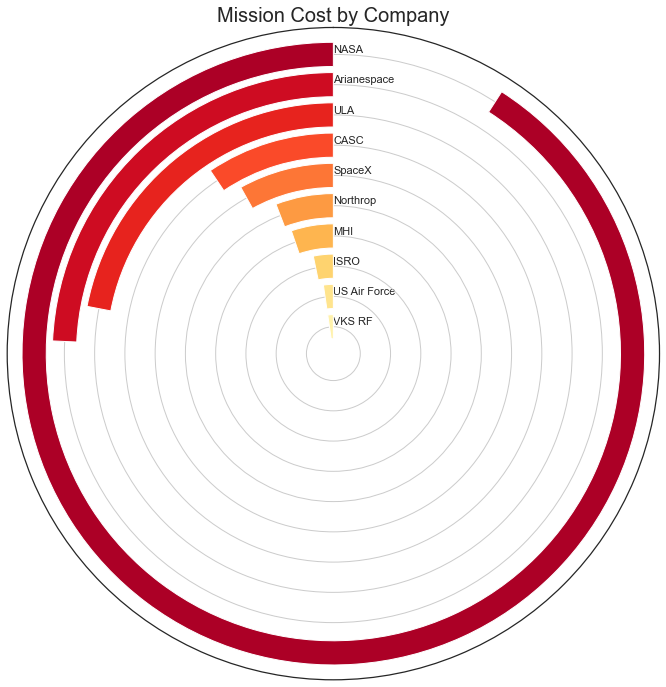

In [137]:
#Circular plot with NASA
# Sum mission costs for each company
df_sum = df_cost.groupby('Company Name')['Mission Cost'].sum().reset_index()
df_sum = df_sum.sort_values(by='Mission Cost', ascending=True).tail(10)

# Set max value
max_val = max(df_sum['Mission Cost'])*1.1

# Set color palette
pal = list(sns.color_palette(palette='YlOrRd', n_colors=len(df_sum)).as_hex())

# Plot Circular Bar Plot
plt.gcf().set_size_inches(12, 12)
ax = plt.subplot(projection='polar')
df_sum.reset_index(inplace=True, drop=True)
for i in range(len(df_sum)):
    ax.barh(i, df_sum['Mission Cost'][i]*2*np.pi/max_val, label=df_sum['Company Name'][i], color=pal[i])

# Set Circular Bar Plot properties
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids(range(len(df_sum)), labels= df_sum['Company Name'])

# Add title
plt.title("Mission Cost by Company", fontsize=20)
plt.show()


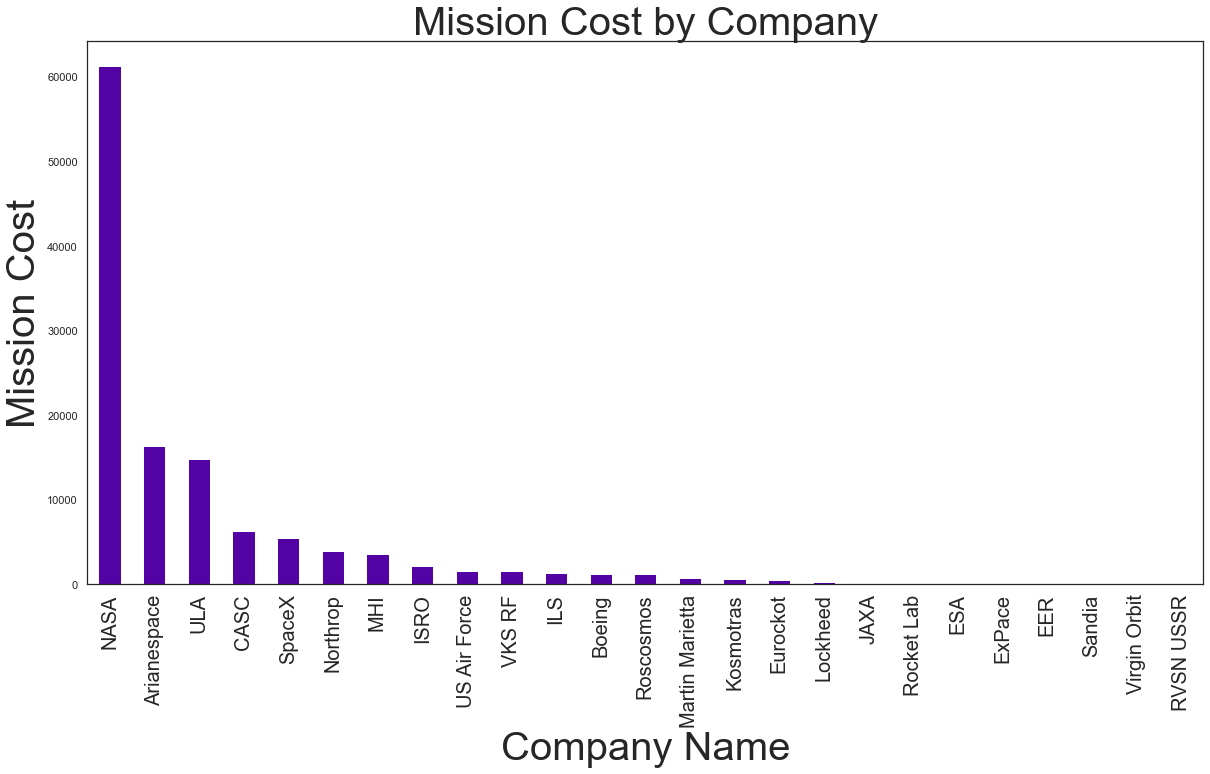

In [138]:
#BAR PLOT WITH 'NASA'
#Bar chart of mission costs by company: 
#This chart will show the total mission costs for each company.
#You can use the 'Company Name' column as the x-axis and the 'Mission Cost' column as the y-axis.
#To calculate the total cost for each company, you can use the groupby method to group the data by 'Company Name' 
#and then sum the 'Mission Cost' column for each group.

plt.figure(figsize=(20,10))
sns.set_palette("plasma")
df_cost.groupby('Company Name')['Mission Cost'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Company Name', fontsize=40)
plt.ylabel('Mission Cost', fontsize=40)
plt.title('Mission Cost by Company', fontsize=40)
plt.xticks(fontsize=20)
# Show plot
plt.show()


In [139]:
#WITHOU 'NASA'
# Sum the mission costs for each company

df_cost_sum = df_cost_sum[df_cost_sum['Company Name']!='NASA'].sort_values(by='Mission Cost', ascending=True).tail(10)
# Sort the companies by mission cost and select the top 10
df_cost_sum = df_cost_sum.sort_values(by='Mission Cost', ascending=True).tail(10)

# Set max value
max_val = max(df_cost_sum['Mission Cost'])*1.1

# Set color palette
pal = list(sns.color_palette(palette='YlOrRd', n_colors=len(df_cost_sum)).as_hex())

# Plot Circular Bar Plot
plt.gcf().set_size_inches(12, 12)
ax = plt.subplot(projection='polar')
df_cost_sum.reset_index(inplace=True, drop=True)
for i in range(len(df_cost_sum)):
    ax.barh(i, df_cost_sum['Mission Cost'][i]*2*np.pi/max_val, label=df_cost_sum['Company Name'][i], color=pal[i])

# Set Circular Bar Plot properties
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids(range(len(df_cost_sum)), labels= df_cost_sum['Company Name'])

# Add title
plt.title("Mission Cost by Company", fontsize=20)
plt.show()


ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 864x864 with 1 Axes>

# Sum the mission costs for each company
df_cost_sum = df_cost.groupby(['Company Name'])['Mission Cost'].sum().reset_index()

# Sort the companies by mission cost and select the top 10
df_cost_sum = df_cost_sum[df_cost_sum['Company Name']!='NASA'].sort_values(by='Mission Cost', ascending=False).head(10)

# Set max value
max_val = max(df_cost_sum['Mission Cost'])*1.1

# Set color palette
pal = list(sns.color_palette(palette='YlOrRd', n_colors=len(df_cost_sum)).as_hex())

# Plot Circular Bar Plot
plt.gcf().set_size_inches(12, 12)
ax = plt.subplot(projection='polar')
df_cost_sum.reset_index(inplace=True, drop=True)
for i in range(len(df_cost_sum)):
    ax.barh(i, df_cost_sum['Mission Cost'][i]*2*np.pi/max_val, label=df_cost_sum['Company Name'][i], color=pal[i])

# Set Circular Bar Plot properties
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids(range(len(df_cost_sum)), labels= df_cost_sum['Company Name'])

# Add title
plt.title("Mission Cost by Company", fontsize=20)
plt.show()


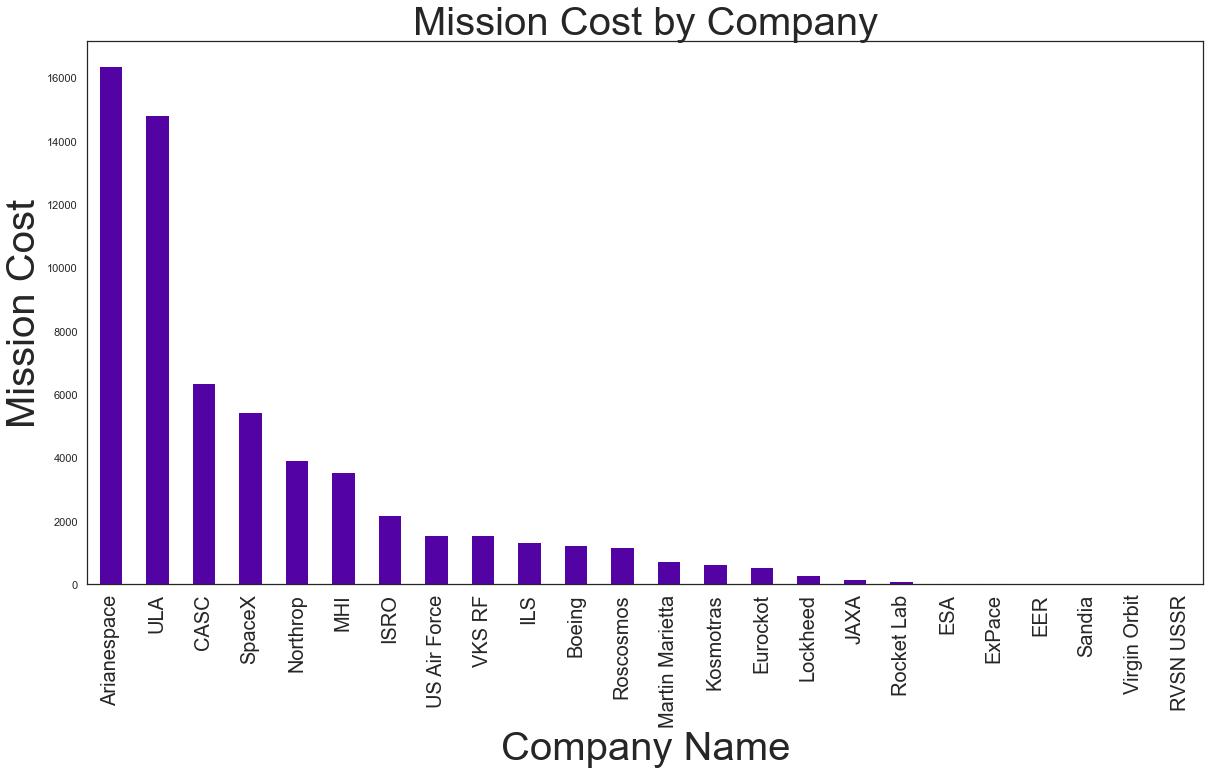

In [140]:
#same but without NASA
# Create a new dataframe without the rows with 'NASA'
plt.figure(figsize=(20,10))
sns.set_palette("plasma")
df_cost_sum = df_cost[df_cost['Company Name']!='NASA']
df_cost_sum.groupby('Company Name')['Mission Cost'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Company Name', fontsize=40)
plt.ylabel('Mission Cost', fontsize=40)
plt.title('Mission Cost by Company', fontsize=40)
plt.xticks(fontsize=20)
# Show plot
plt.show()


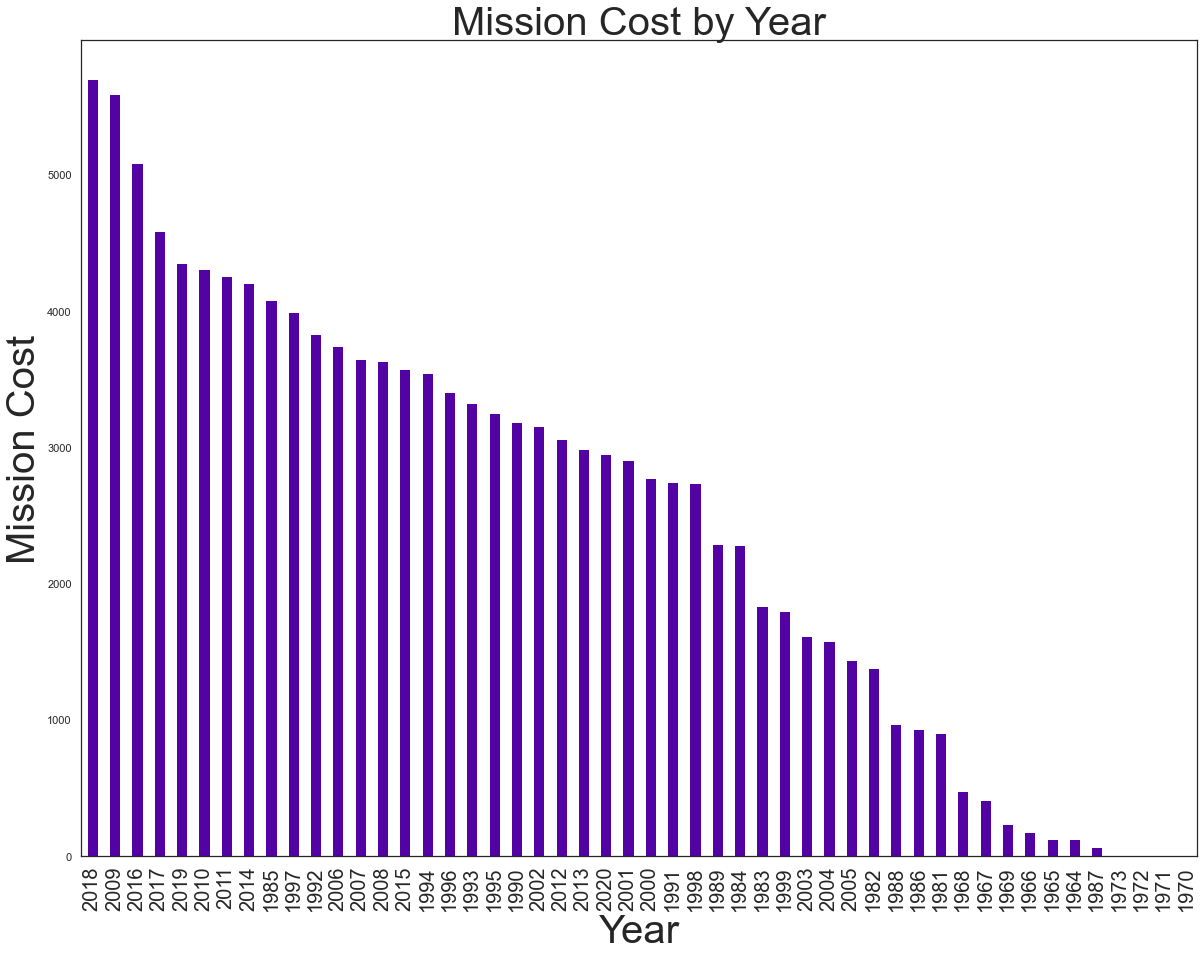

In [141]:
#Bar chart of mission costs by company:
#This chart will show the total mission costs for each company.
#You can use the 'Company Name' column as the x-axis and the 'Mission Cost' column as the y-axis.
#To calculate the total cost for each company, you can use the groupby method to group the data by 'Company Name'
#and then sum the 'Mission Cost' column for each group.
plt.figure(figsize=(20,15))
sns.set_palette("plasma")
df_cost.groupby('Year')['Mission Cost'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Year', fontsize=40)
plt.ylabel('Mission Cost', fontsize=40)
plt.title('Mission Cost by Year', fontsize=40)
plt.xticks(fontsize=20)
plt.show()


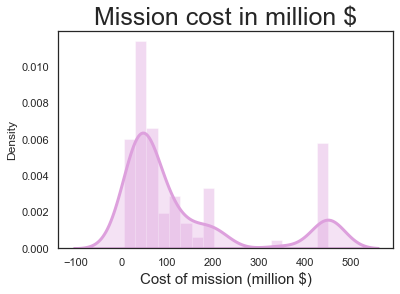

In [142]:
#Instead of showing the confidence interval, 
#we can use the shade parameter in kde_kws with alpha to show the uncertainty of the estimated density.
#You can adjust the alpha parameter to control the transparency of the shaded area.
#A lower value of alpha will make the shaded area more transparent 
#and a higher value will make it more opaque.plt.figure(figsize=(10,8))

#So, this code will show the uncertainty of the estimated density of the Mission Cost
sns.distplot(df_cost['Mission Cost'], color='plum', kde_kws={'shade': True, 'linewidth': 3, 'fill':True,'alpha':0.3})
plt.title('Mission cost in million $',size=25)
plt.xlabel('Cost of mission (million $)',size=15)
plt.show()


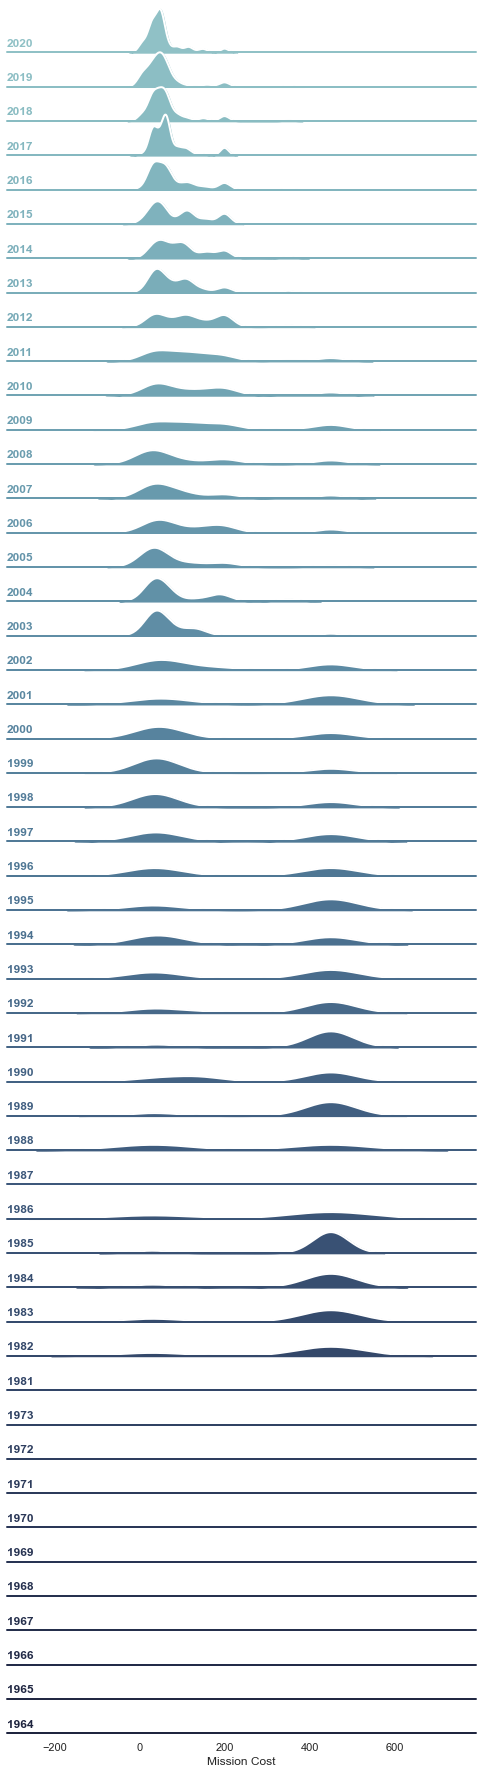

In [143]:
import warnings
warnings.simplefilter('ignore')
# Check variance of Mission cost column
if df_cost['Mission Cost'].var() == 0:
    df_cost['Mission Cost'] = df_cost['Mission Cost'] + np.random.normal(0, 1, len(df_cost))

# Set theme for plot
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(len(df_cost['Year'].unique()), rot=-.25, light=.7)
g = sns.FacetGrid(df_cost, row="Year", hue="Year", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Mission Cost",shade=True,
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Mission Cost", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Mission Cost")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes
# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)




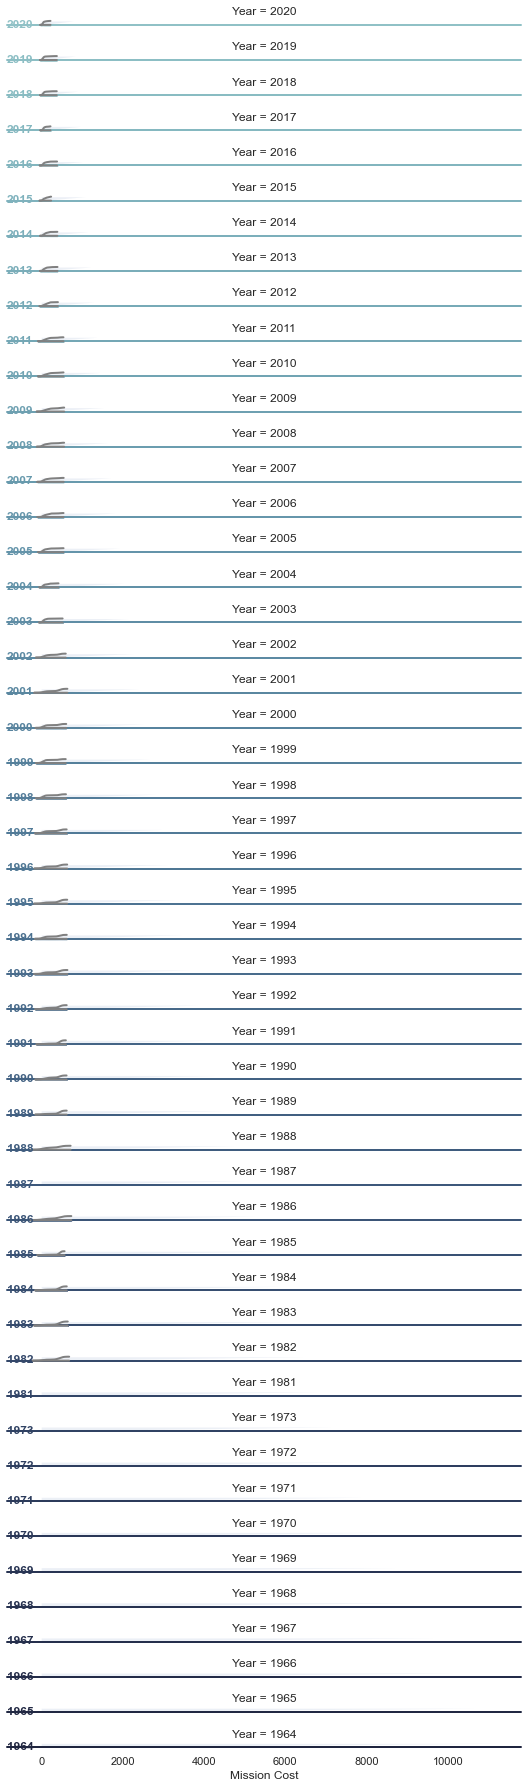

In [144]:
import warnings
warnings.simplefilter('ignore')
# Check variance of Mission cost column
if df_cost['Mission Cost'].var() == 0:
    df_cost['Mission Cost'] = df_cost['Mission Cost'] + np.random.normal(0, 1, len(df_cost))

# Set theme for plot
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(len(df_cost['Year'].unique()), rot=-.25, light=.7)
g = sns.FacetGrid(df_cost, row="Year", hue="Year", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Mission Cost",shade=True,
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Mission Cost", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Mission Cost")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes
# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.map(sns.kdeplot, "Mission Cost",shade=True,
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Mission Cost", clip_on=False, color='gray', lw=2, bw_adjust=.5)
g.map(sns.kdeplot, "Mission Cost", clip_on=False, color='gray', lw=2, bw_adjust=.5, cumulative=True)
for ax in g.axes.flat:
    ax.fill_betweenx(np.linspace(0,1,100), np.linspace(0,1,100)*ax.get_xlim()[1], alpha=.1)



In [145]:
from sklearn.model_selection import train_test_split
#Splitting the data into train and test sets
X = df_cost.drop(columns=['Mission Cost'])
y = df_cost['Mission Cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#Building a Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
print("Accuracy Score of Random Forest Classifier:", accuracy_score(y_test, rfc_predict))
print("Confusion Matrix of Random Forest Classifier:\n", confusion_matrix(y_test, rfc_predict))

ValueError: could not convert string to float: 'ISRO'

In [148]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
#Building a Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
log_reg_predict = log_reg.predict(X_test)
print("Accuracy Score of Logistic Regression:", accuracy_score(y_test, log_reg_predict))
print("Confusion Matrix of Logistic Regression:\n", confusion_matrix(y_test, log_reg_predict))

ValueError: could not convert string to float: 'ISRO'

In [149]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
#Building a Decision Tree Classifier model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)
print("Accuracy Score of Decision Tree Classifier:", accuracy_score(y_test, dtc_predict))
print("Confusion Matrix of Decision Tree Classifier:\n", confusion_matrix(y_test, dtc_predict))

ValueError: could not convert string to float: 'ISRO'

In [ ]:


# Create the 'df_cost' dataset
years = np.arange(1960, 2021, 10)
mission_costs = np.random.randint(low=1000, high=1000000000, size=len(years))

#Check variance of Mission cost column
if df_cost['Mission Cost'].var() == 0:
    df_cost['Mission Cost'] = df_cost['Mission Cost'] + np.random.normal(0, 1, len(df_cost))
    
# Set theme for plot
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(len(years), rot=-.25, light=.7)
g = sns.FacetGrid(df_cost, row="Year", hue="Year", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Mission Cost",shade=True,
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Mission Cost", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Mission Cost")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)


In [1017]:
df_cost.to_csv("Space Missions")